In [1]:
from PolarH10 import PolarH10
from bleak import BleakScanner
import numpy as np
from matplotlib import pyplot as plt
import asyncio
from tqdm import tqdm
# from datetime import datetime
# import os
# import sys
# sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(__file__), '../..')))

# from time_utils import *
# from save_timestamp_data import *
# from log_utils import *
# import configparser
# import json



In [2]:
devices = await BleakScanner.discover()

In [3]:
devices

[BLEDevice(07:8A:B5:66:C2:06, 07-8A-B5-66-C2-06),
 BLEDevice(56:FD:BA:34:73:4B, 56-FD-BA-34-73-4B),
 BLEDevice(35:73:93:BA:42:02, 35-73-93-BA-42-02),
 BLEDevice(CC:D4:B8:B2:48:90, Polar H10 C567652F)]

In [4]:
record_len = 30
for device in devices:
    if device.name is not None and "Polar" in device.name:
        print("Find Polar H10!")
        polar_device = PolarH10(device)
        await polar_device.connect()
        try:
            await polar_device.get_device_info()
            await polar_device.print_device_info()
            await polar_device.start_ecg_stream()
            await polar_device.start_hr_stream()
            for i in tqdm(range(record_len), desc='Recording...'):
                await asyncio.sleep(1)
            await polar_device.stop_ecg_stream()
            await polar_device.stop_hr_stream()

            # acc_data = polar_device.get_acc_data()
            ecg_data = polar_device.get_ecg_data()
            # ibi_data = polar_device.get_ibi_data()
            hr_data = polar_device.get_hr_data()
        finally:
            await polar_device.disconnect()


Find Polar H10!
Model Number: H10 
Manufacturer Name: Polar Electro Oy 
Serial Number: C567652F 
Address: CC:D4:B8:B2:48:90
Battery Level: 100%
Firmware Revision: 5.0.0 
Hardware Revision: 01234567.00 
Software Revision: 3.2.0 


Recording...: 100%|██████████| 30/30 [00:30<00:00,  1.00s/it]

Stopping ECG data...
Stopping HR data...


In [5]:
# ecg_data['times'][-1] - ecg_data['times'][0]

In [6]:
# hr_data['times'][-1] - hr_data['times'][0]

In [7]:
print(ecg_data)

{'times': [], 'values': []}


In [8]:
len(hr_data['times'])

21

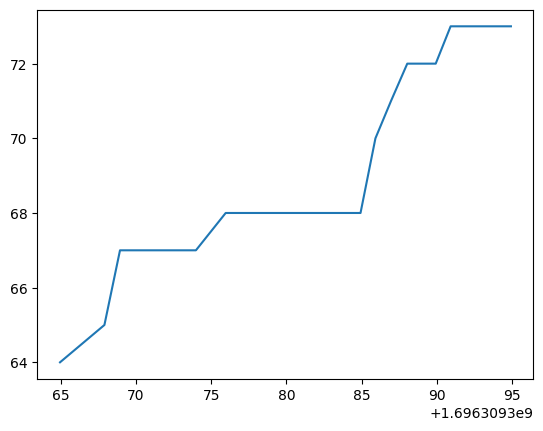

In [9]:
plt.plot(hr_data["times"],hr_data["values"])

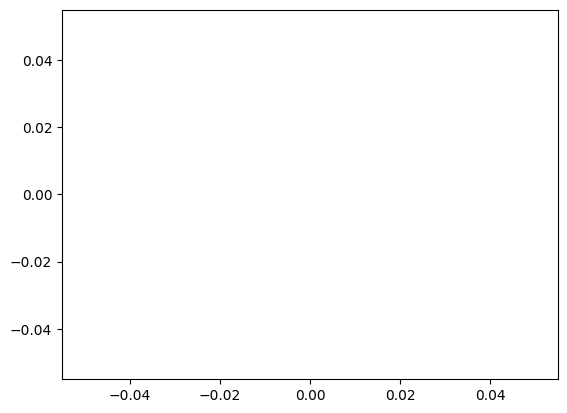

In [10]:
plt.plot(ecg_data["times"][:],ecg_data["values"][:])

In [11]:
len(ecg_data["values"])

0

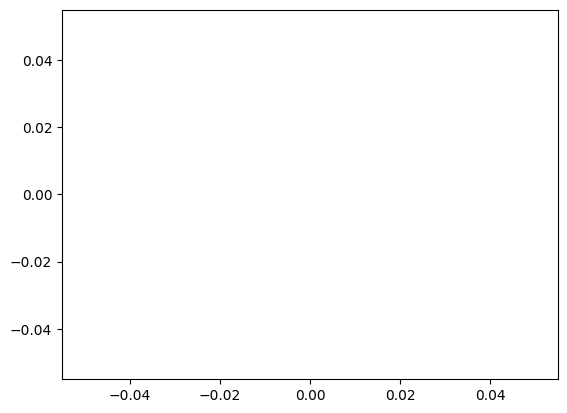

In [12]:
plt.plot(ecg_data['values'][:400])